In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

from utils import generate_features, define_holidays

In [6]:
df = pd.read_csv('data/df.csv', index_col=0)
df = df.sort_values(by='date')
df.shape

(226486, 5)

In [7]:
df = generate_features(df)
df

,date,sku_id,sales_price,sales_quantity,year,month,day,day_of_year,day_of_week,is_weekend,category_1,category_2,category_3,growing_sum_sales_price
249598,2016-11-18,415510,23.205,1.0,2016,11,18,323,4,False,0,1,0,23.205
249608,2016-11-18,420009,22.490,2.0,2016,11,18,323,4,False,0,1,0,22.490
714145,2016-11-18,567734,23.205,1.0,2016,11,18,323,4,False,0,1,0,23.205
699986,2016-11-18,556333,32.760,2.0,2016,11,18,323,4,False,0,1,0,32.760
683507,2016-11-18,566241,283.400,1.0,2016,11,18,323,4,False,1,0,0,283.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20699585,2020-10-31,458375,349.700,1.0,2020,10,31,305,5,False,1,0,0,26058.214
20699624,2020-10-31,487116,388.700,1.0,2020,10,31,305,5,False,1,0,0,33497.620
20699682,2020-10-31,132689,356.200,1.0,2020,10,31,305,5,False,1,0,0,78832.624
20688487,2020-10-31,621322,54.600,1.0,2020,10,31,305,5,False,0,1,0,20695.350


In [8]:
df = define_holidays(df)
df

['2017-01-01', '2017-01-07', '2017-03-08', '2017-04-17', '2017-04-18', '2017-05-01', '2017-05-09', '2017-06-19', '2017-06-28', '2017-08-24', '2017-10-14', '2017-12-25', '2018-01-01', '2018-01-07', '2018-03-08', '2018-04-17', '2018-04-18', '2018-05-01', '2018-05-09', '2018-06-19', '2018-06-28', '2018-08-24', '2018-10-14', '2018-12-25', '2019-01-01', '2019-01-07', '2019-03-08', '2019-04-17', '2019-04-18', '2019-05-01', '2019-05-09', '2019-06-19', '2019-06-28', '2019-08-24', '2019-10-14', '2019-12-25', '2020-01-01', '2020-01-07', '2020-03-08', '2020-04-17', '2020-04-18', '2020-05-01', '2020-05-09', '2020-06-19', '2020-06-28', '2020-08-24', '2020-10-14', '2020-12-25', '2021-01-01', '2021-01-07', '2021-03-08', '2021-04-17', '2021-04-18', '2021-05-01', '2021-05-09', '2021-06-19', '2021-06-28', '2021-08-24', '2021-10-14', '2021-12-25']


,holidays,date,sku_id,sales_price,sales_quantity,year,month,day,day_of_year,day_of_week,is_weekend,category_1,category_2,category_3,growing_sum_sales_price
0,0,2017-01-01,28903,217.100,1.0,2017,1,1,1,6,True,1,0,0,9552.400
1,0,2017-01-01,8075,20.150,5.0,2017,1,1,1,6,True,0,1,0,839.150
2,0,2017-01-01,69265,39.117,2.0,2017,1,1,1,6,True,0,0,1,1581.515
3,0,2017-01-01,589893,23.205,3.0,2017,1,1,1,6,True,0,1,0,951.405
4,0,2017-01-01,661434,27.300,1.0,2017,1,1,1,6,True,0,1,0,1179.360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226481,0,2016-12-31,471089,175.500,2.0,2016,12,31,366,5,False,1,0,0,746.200
226482,0,2016-12-31,72372,283.400,3.0,2016,12,31,366,5,False,1,0,0,1133.600
226483,0,2016-12-31,486211,349.700,2.0,2016,12,31,366,5,False,1,0,0,1049.100
226484,0,2016-12-31,24121,25.935,2.0,2016,12,31,366,5,False,0,1,0,819.000


In [9]:
# Splitting data into train and test
number_of_dates = df.date.nunique()
dates = df.date.unique()
date_to_split = dates[int(number_of_dates*0.8)]

train = df[df.date < date_to_split].drop('date', axis=1)
test = df[df.date >= date_to_split].drop('date', axis=1)

dates_for_plot = df.loc[df.date >= date_to_split, 'date']

X_train, y_train = train.drop('sales_quantity', axis=1), train['sales_quantity']
X_test, y_test = test.drop('sales_quantity', axis=1), test['sales_quantity']
X_train

,holidays,sku_id,sales_price,year,month,day,day_of_year,day_of_week,is_weekend,category_1,category_2,category_3,growing_sum_sales_price
0,0,28903,217.100,2017,1,1,1,6,True,1,0,0,9552.400
1,0,8075,20.150,2017,1,1,1,6,True,0,1,0,839.150
2,0,69265,39.117,2017,1,1,1,6,True,0,0,1,1581.515
3,0,589893,23.205,2017,1,1,1,6,True,0,1,0,951.405
4,0,661434,27.300,2017,1,1,1,6,True,0,1,0,1179.360
...,...,...,...,...,...,...,...,...,...,...,...,...,...
226481,0,471089,175.500,2016,12,31,366,5,False,1,0,0,746.200
226482,0,72372,283.400,2016,12,31,366,5,False,1,0,0,1133.600
226483,0,486211,349.700,2016,12,31,366,5,False,1,0,0,1049.100
226484,0,24121,25.935,2016,12,31,366,5,False,0,1,0,819.000


In [10]:
# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200],  
    'max_depth': [10, 20],       
    'min_samples_split': [5, 10]   
}
model = RandomForestRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)

# Perform GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best MAE Score:", best_score)


Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best MAE Score: -7.671862587534481


Mean Absolute Error Train: 4.51553096753741
Mean Absolute Error Test: 5.942176213060074


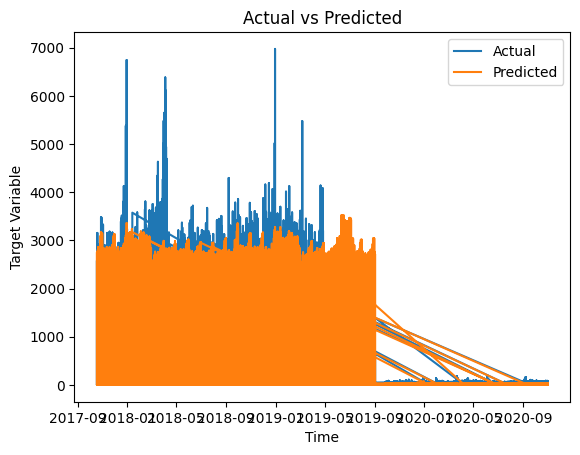

In [11]:
# Updated model
model_updated = RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=200)
model_updated.fit(X_train, y_train)

# Make predictions
y_pred = model_updated.predict(X_test)

# Evaluate the model
mae_train = mean_absolute_error(y_train, model_updated.predict(X_train))
mae_test = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error Train:", mae_train)
print("Mean Absolute Error Test:", mae_test)

# Visualize predictions
plt.plot(dates_for_plot, y_test, label='Actual')
plt.plot(dates_for_plot, y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Target Variable')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [12]:
import pickle

model_bytes = pickle.dumps(model_updated)
with open('model.pkl', 'wb') as f:
    f.write(model_bytes)